## Assignment 3: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting? 
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression predicts a continuous number, like price or weight while classification predicts a category or label like spam vs. not spam emails.
2. A confusion table shows how many predictions were correct vs. incorrect which is broken down by class. It helps us see the accuracy as well as where the model is making mistakes.
3. SSE measures how far the model’s predictions are from the actual values and lower SSE means the model is fitting the data better.
4. Overfitting means the model learns the training data too closely and fails on new data but
underfitting means model is too simple and misses important patterns.
5. It prevents us from tuning the model only to the training data so the test set gives a more realistic measure of the model's performance and helps pick a model that generalizes better.
6. Labels are simple and easy to interpret, but gives no info about uncertainty while probability distribution shows confidence across classes, but it ends up being more complex and can be harder to explain.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [ ]:
# 2.1

import pandas as pd
file = "./data/USA_cars_datasets.csv"
df_default = pd.read_csv(file)

keepCols = ["price","year","mileage"]
df = df_default[keepCols].copy()
df.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [ ]:
print(df.shape)

display(df.isna().sum()) # no NAs to handle


(2499, 3)


price      0
year       0
mileage    0
dtype: int64

In [ ]:
# 2.2

def maxmin(z):
    z = (z - min(z)) / (max(z) - min(z))
    return z

features = ["year", "mileage"]
target = "price"

X = df[features].apply(maxmin)   # normalize these w maxmin
y = df[target]

display(X.head())

,year,mileage
0,0.744681,0.269287
1,0.808511,0.187194
2,0.957447,0.038892
3,0.872340,0.063016
4,0.957447,0.006537


In [ ]:
# 2.3

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shapes:", X_train.shape, X_test.shape)

Shapes: (1999, 2) (500, 2)


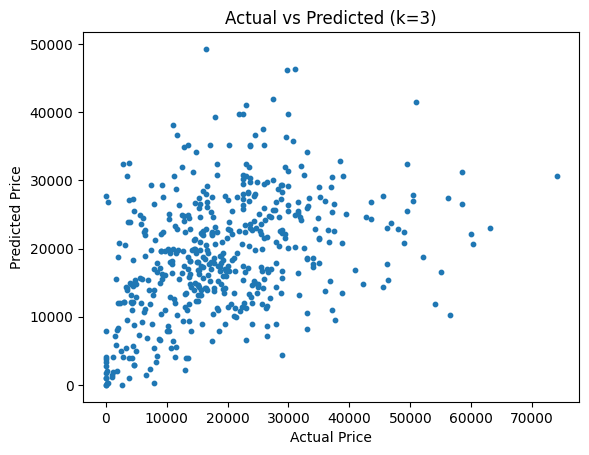

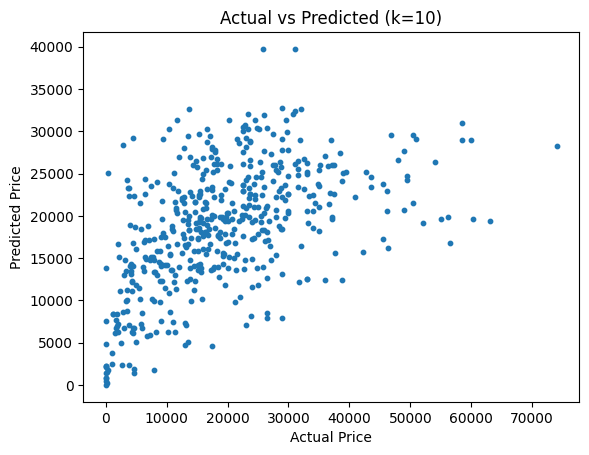

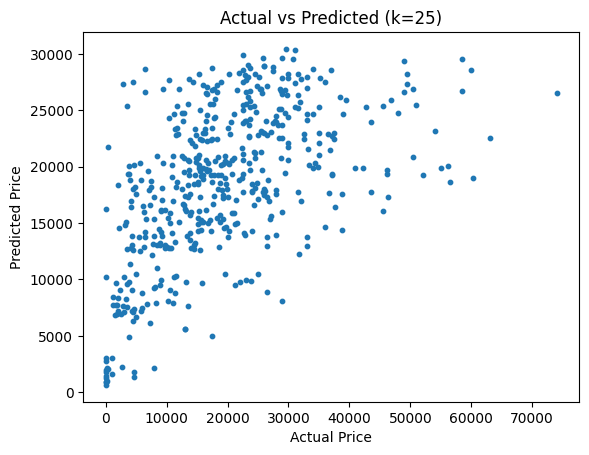

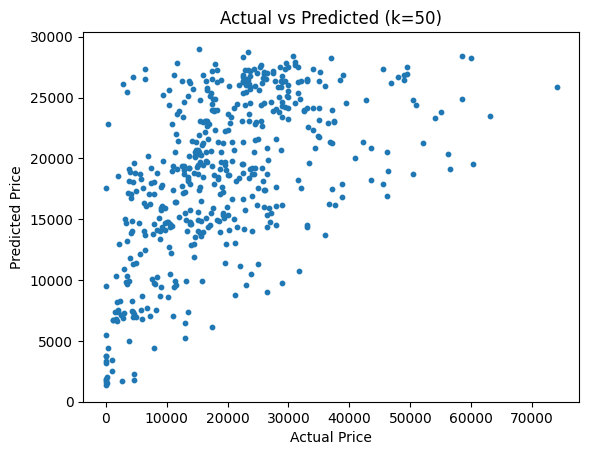

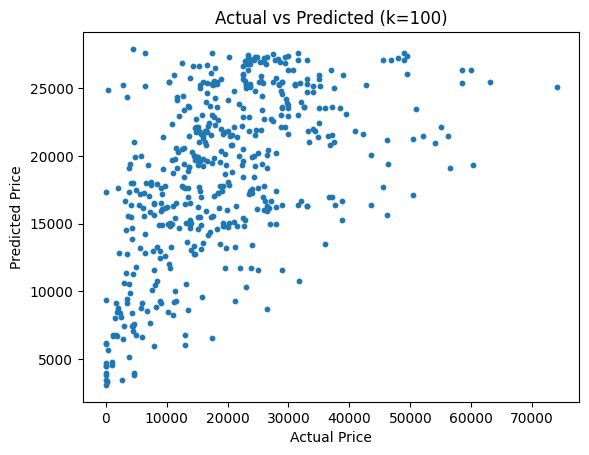

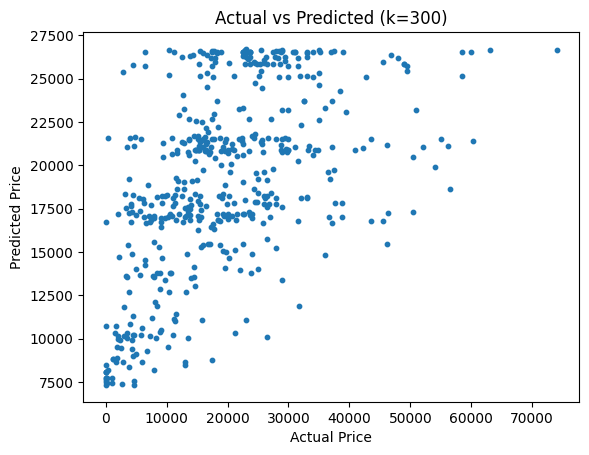

In [6]:
k_vals = [3, 10, 25, 50, 100, 300]
results = []

for k in k_vals:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    # are we allowed to use mean squared error here
    # notes only covered sse so i searched this up
    mse = mean_squared_error(y_test, y_pred) 
    results.append({"k": k, "mse": mse})
    
    # scatter plot
    plt.figure()
    plt.scatter(y_test, y_pred, s=10)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"Actual vs Predicted (k={k})")
    plt.show()

In [7]:
print("k and MSE:", results)

k and MSE: [{'k': 3, 'mse': 148104157.1862222}, {'k': 10, 'mse': 117399126.10604002}, {'k': 25, 'mse': 112600455.15990078}, {'k': 50, 'mse': 110202549.3014296}, {'k': 100, 'mse': 112251075.33766721}, {'k': 300, 'mse': 114497987.75799589}]


As we increase the k, we can see that at smaller k values the predictions are a bit spread but follow their neighbors and they are close to the diagonal but experiences overfitting. The middle k has smoothed out a bit and predictions are closer to the diagonal. Larger k experiences its predictions averaging too closely to its neighbors and don't stick as closely to the diagonal, showing it isn't a good fit.

In [9]:
# 2.5

results_df = pd.DataFrame(results)
display(results_df)

best_k = results_df.loc[results_df['mse'].idxmin()]
print(f"Best k = {best_k['k']} with MSE = {best_k['mse']:.2f}")

,k,mse
0,3,1.481042e+08
1,10,1.173991e+08
2,25,1.126005e+08
3,50,1.102025e+08
4,100,1.122511e+08
5,300,1.144980e+08


Best k = 50.0 with MSE = 110202549.30


2.6 </br></br>
Small k values like 3 can overfit which mean predictions closely follow the local noise and don't do well on data it hasn't seen before. </br></br>
Large k values such as 300 can underfit so predictions shrink toward the mean and over generalize. </br></br>
k = 50 managed to balance both variance and bias so it does not overfit and it also doesn't underfit the data, as we saw in the other k values.

**Q3.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.